# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
>estimates relationship between one independent variable and a dependent with a straight line
- What type of machine learning is linear regression?
>Supervised
- What is a “line of best fit” using the OLS method?
> Straight line that minimizes distance between data and itself
- What is the difference between correlation and regression?
> Regression shows relationship in an equation correlation shows relationship strength
- Describe a scenario when you would use linear regression and why you would use it. 
> To find a relationship with one or more variables


### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity
> Data with a linear line betweeen variables
- Normality
> Bell Curve of data
- Homoscedasticity
> Where data cant be spread out on either end of the curve
- No multicollinearity
> No correlation beteween variables
- No endogeneity
> When the predictor variable has no correlation with the error term in a model. Endogeneity loosely refers to outside influences that may have an impact on correlation between two variables, and if it can be seen as a casual effect or not.
- No autocorrelation
> No repeating patterns in the data

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0)
> Constant C variable, shows the verticle movement
- Coefficient of Independent Variable (B1)
> Slope coefficient, higher valuses indicates independent variable increase, and the mean of the dependent variable tents to increase as well
- Standard Error
> Average distance that the observed values fall from the regression line
- T-Statistic
> Helps determine the overall linearity of a relatioship between two variables
- P-Value of T-Statistic (from the independent variable)
> Result of T-Stat test that reveals the significance of regression

### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared
> Value between 1 and -1, that helps determine variance
- Adjusted R-squared
> Helps with the 'big-event' variance, and only takes more normalized data occurences


# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [1]:
# make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

In [2]:
# load data
df = pd.read_csv('house_data.csv')

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [3]:
# explore data below (you will need to make new cells)


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,1,3,7.0,1180.0,0,1955.0,98178.0,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,1,3,7.0,2170.0,400,1951.0,98125.0,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,1,3,6.0,770.0,0,1933.0,98028.0,47.7379,-122.233,2720
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,1,5,7.0,1050.0,910,1965.0,98136.0,47.5208,-122.393,1360
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,1,3,8.0,1680.0,0,1987.0,98074.0,47.6168,-122.045,1800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
count,2.045600e+04,2.045600e+04,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20452.000000,20456.000000,20456.000000,20456.000000
mean,4.634802e+09,4.863355e+05,3.310422,2.032062,1942.120258,10302.509875,1.473455,0.004155,1.179165,3.411322,7.514241,1679.184542,262.887808,1969.985041,95297.064395,47.559194,-122.219543,1902.208594
std,2.877504e+09,2.398423e+05,0.855849,0.689049,724.345438,12700.282036,0.537955,0.064329,0.661116,0.652286,1.026879,683.115368,390.859372,29.355600,15428.241686,0.139330,0.138576,585.143495
min,1.000102e+06,3.209000e+03,1.000000,0.000000,370.000000,520.000000,1.000000,0.000000,1.000000,1.000000,3.000000,300.000000,0.000000,1900.000000,9801.000000,47.155900,-122.512000,399.000000
25%,2.161850e+09,3.120000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1170.000000,0.000000,1950.750000,98032.000000,47.467200,-122.332000,1460.000000
50%,3.992700e+09,4.350000e+05,3.000000,2.000000,1840.000000,7412.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1500.000000,0.000000,1972.000000,98072.000000,47.569650,-122.244500,1790.000000
75%,7.387500e+09,6.020000e+05,4.000000,2.500000,2410.000000,10022.250000,2.000000,0.000000,1.000000,4.000000,8.000000,2080.000000,520.000000,1995.000000,98118.000000,47.679400,-122.134000,2260.000000
max,9.900000e+09,1.640000e+06,6.000000,4.250000,4600.000000,133729.000000,3.500000,1.000000,5.000000,5.000000,12.000000,3960.000000,1540.000000,2050.000000,98199.000000,47.777600,-121.315000,3790.000000


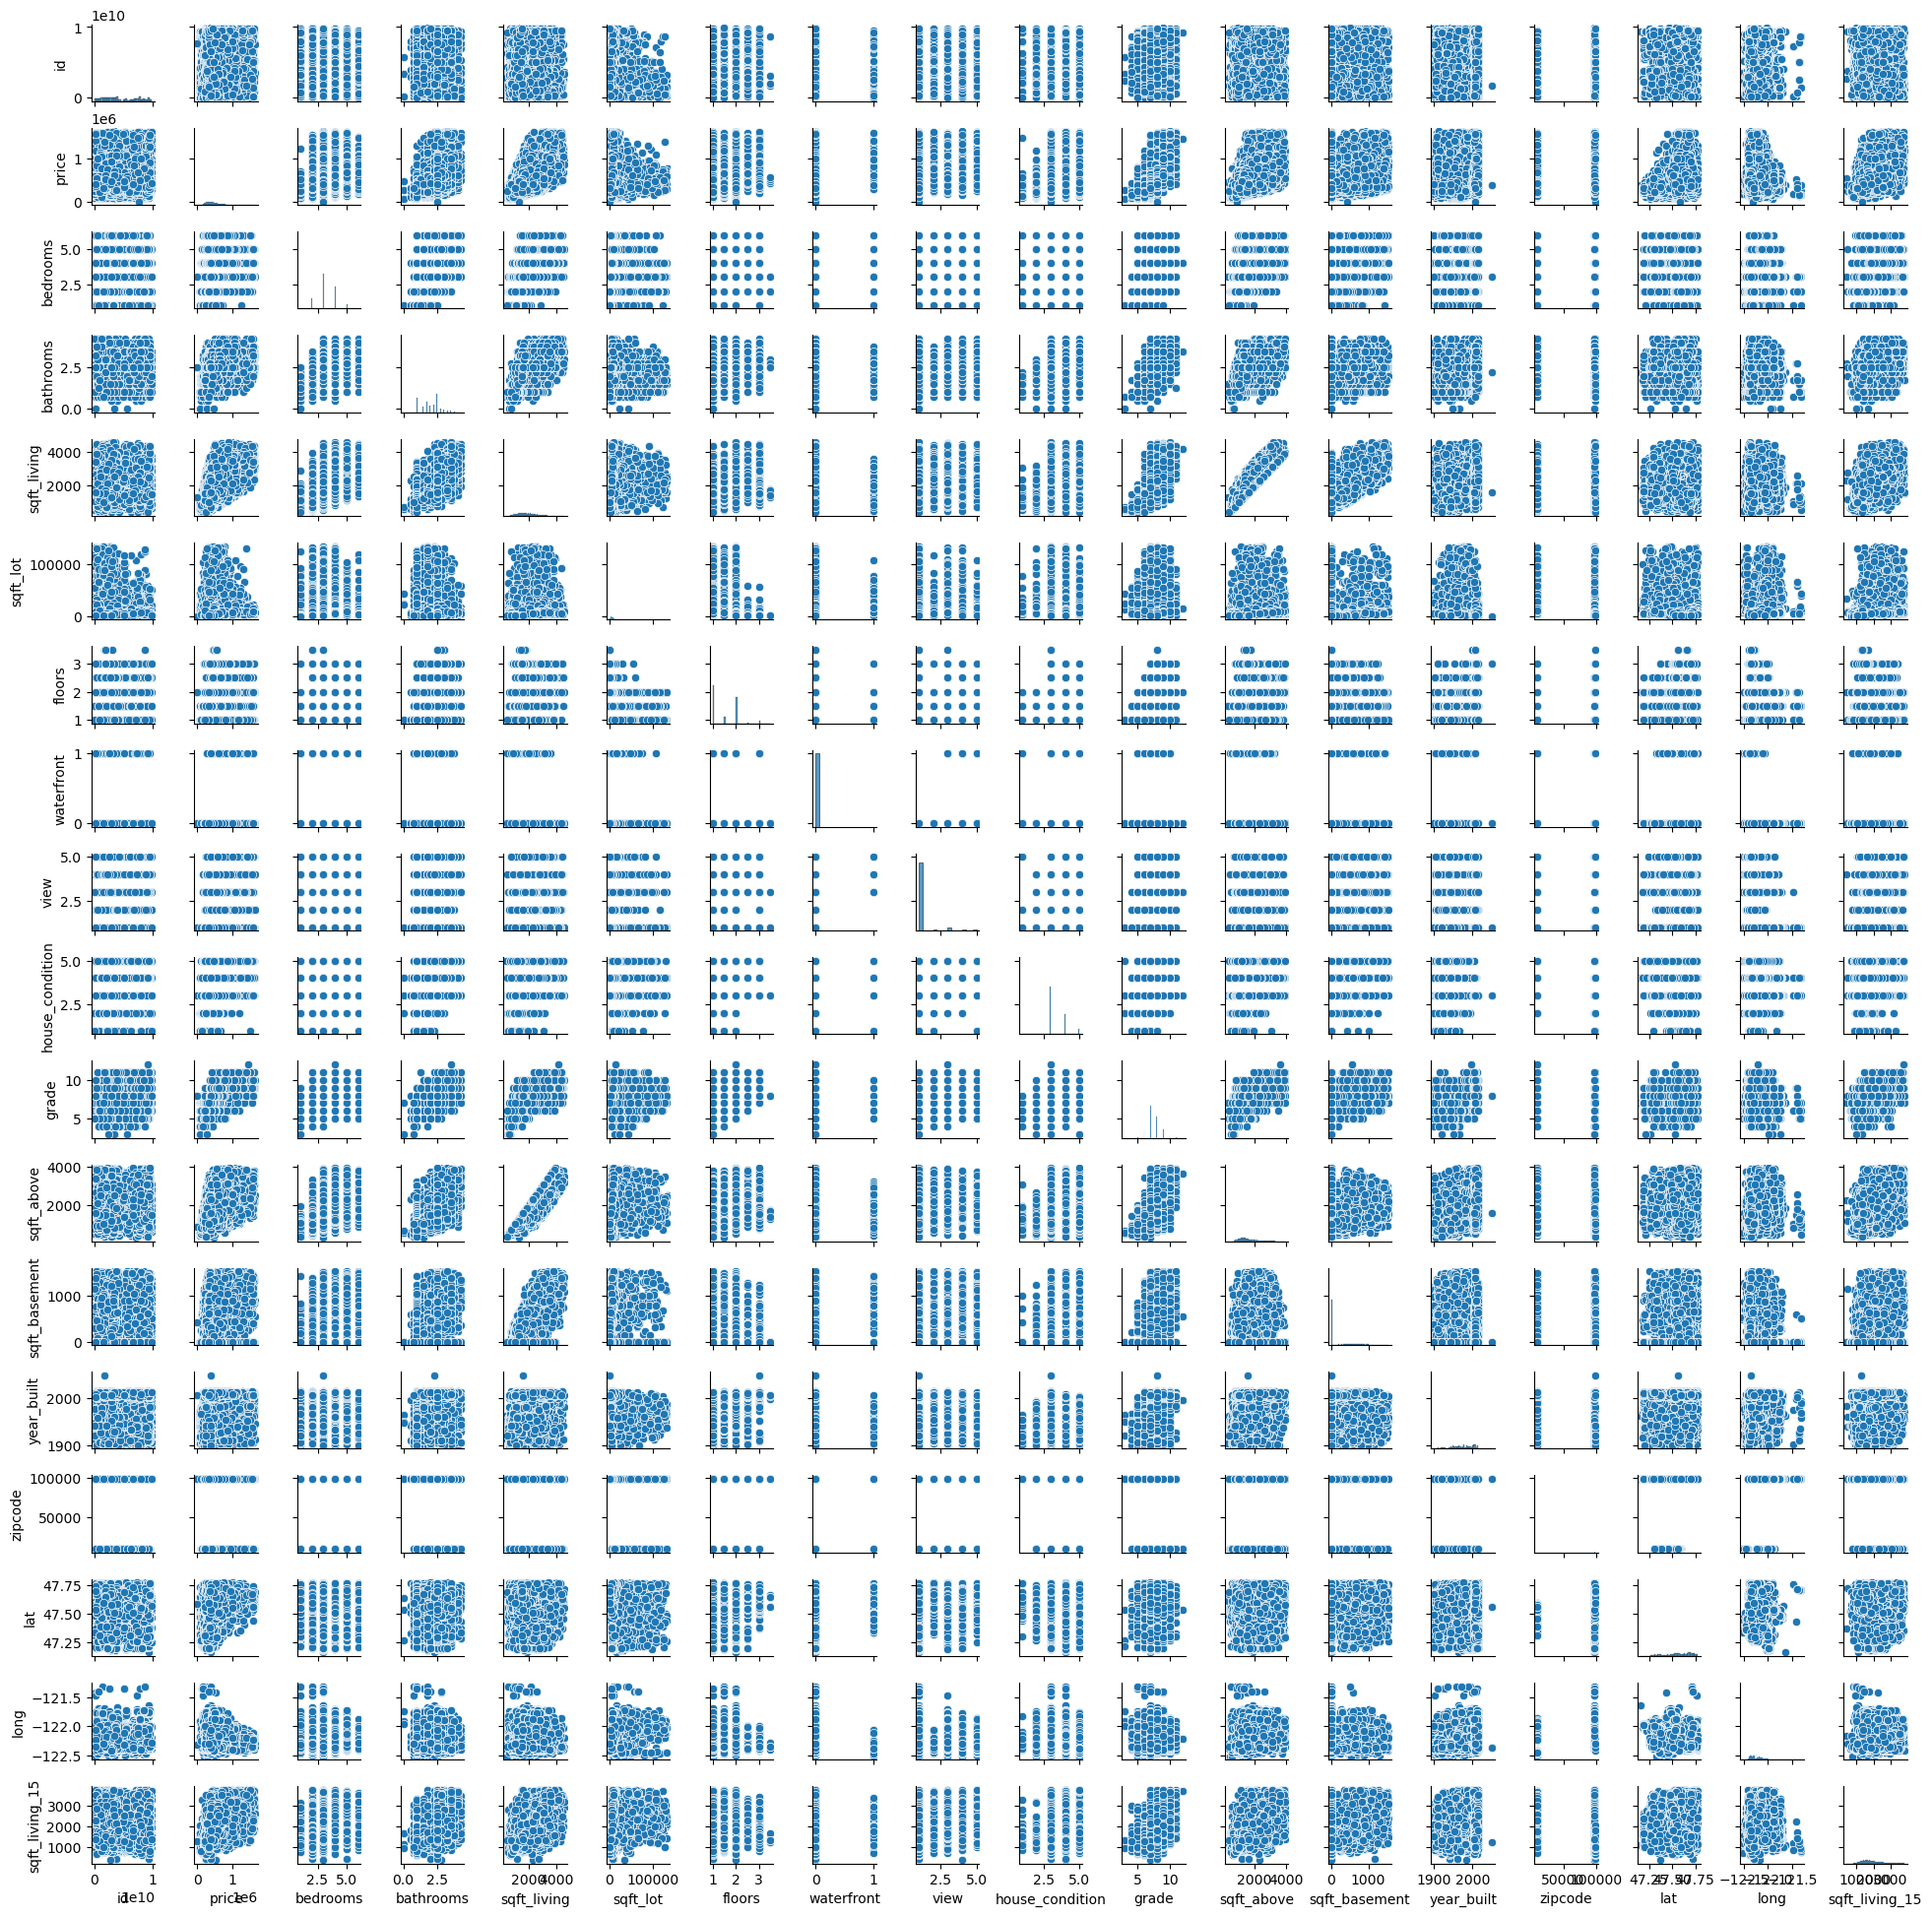

In [7]:
sns.pairplot(df, height = 1.1);

In [8]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
id,1.000000,0.010757,0.009618,0.029597,0.019003,-0.135150,0.029240,0.008023,0.024504,-0.026959,0.037230,0.022336,-0.003931,0.031807,0.032456,-0.001807,0.042095,0.016390
price,0.010757,1.000000,0.285851,0.441803,0.613010,0.067206,0.269991,0.106203,0.296863,0.061239,0.626245,0.505233,0.253044,0.019607,-0.048335,0.415365,0.004102,0.538592
bedrooms,0.009618,0.285851,1.000000,0.487899,0.601646,0.071999,0.164007,-0.038525,0.032773,0.028820,0.329490,0.479424,0.277120,0.164924,-0.030538,-0.028092,0.139352,0.384110
bathrooms,0.029597,0.441803,0.487899,1.000000,0.710514,0.042485,0.514539,0.002785,0.103642,-0.121418,0.614198,0.626558,0.221777,0.537778,-0.033949,0.004705,0.225338,0.519737
sqft_living,0.019003,0.613010,0.601646,0.710514,1.000000,0.196979,0.357559,0.016142,0.178901,-0.051737,0.701670,0.847323,0.372436,0.335907,-0.052667,0.035525,0.245588,0.728225
sqft_lot,-0.135150,0.067206,0.071999,0.042485,0.196979,1.000000,-0.103041,0.059058,0.059335,0.035667,0.103452,0.188274,0.036073,0.029347,-0.092799,-0.086575,0.279048,0.247072
floors,0.029240,0.269991,0.164007,0.514539,0.357559,-0.103041,1.000000,0.002481,0.006431,-0.260133,0.465698,0.542280,-0.285130,0.498247,0.007514,0.041703,0.120916,0.266070
waterfront,0.008023,0.106203,-0.038525,0.002785,0.016142,0.059058,0.002481,1.000000,0.345743,0.014025,0.008355,0.002846,0.024949,-0.039317,-0.083849,-0.035711,-0.052893,0.029955
view,0.024504,0.296863,0.032773,0.103642,0.178901,0.059335,0.006431,0.345743,1.000000,0.039282,0.160320,0.076327,0.198176,-0.077140,-0.040398,0.003387,-0.103967,0.207043
house_condition,-0.026959,0.061239,0.028820,-0.121418,-0.051737,0.035667,-0.260133,0.014025,0.039282,1.000000,-0.146106,-0.158870,0.181859,-0.346117,-0.044892,-0.011933,-0.089011,-0.091993


In [9]:
sns.heatmap(df.corr());

### Step 3: Determine independent and dependent variable

In [10]:
# sets X to sqft_living

x1 = df['sqft_living']

# sets Y to price

y = df['price']

In [11]:
# visualize relationship between X and Y
plt.figure(figsize=(10,6))
plt.scatter(x1, y)
plt.xlabel('Sq. Ft. of Living Space', fontsize=18)
plt.ylabel('Price', fontsize=18);

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [12]:
# fit model to X and Y variables (you will need to make more cells)

In [13]:
x = sm.add_constant(x1)

In [14]:
results = sm.OLS(y,x).fit()

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:29:05   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5: Interpret Model Summary 

In [16]:
# print out and interpret model summary // terms identified below

Interpret the following from your model:

- R-squared = .376
- Coefficient of independent variable = 0
- P-value of T-statistic = 110.966
- P-value of F-statistic = 0
> notes: we see that there is multicollinearity within our data

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [17]:
new_df = pd.DataFrame({'constant':1, 'sqft_living':[1100, 1500]})
new_df

,constant,sqft_living
0,1,1100
1,1,1500


In [18]:
predictions = results.predict(new_df)
predictions

0    315404.008401
1    396595.022459
dtype: float64

In [19]:

new_df['price_predictions'] = results.predict(new_df)
new_df

,constant,sqft_living,price_predictions
0,1,1100,315404.008401
1,1,1500,396595.022459


# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [20]:
# Pick another independent variable. Be sure to avoid multicollinearity. 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [22]:
# fit new regression model (you will need to make more cells)

In [23]:
y = df['price']
x1 = df[['sqft_living', 'bathrooms']]

In [24]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     6158.
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:29:05   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20453   BIC:                         5.552e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.897e+04   4270.701     20.832      0.000    8.06e+04    9.73e+04
sqft_living   200.0080      2.599     76.945      0.000     194.913     205.103
bathrooms    4393.5333   2732.507      1.608      0.108    -962.399    9749.466
==============================================================================
Omnibus:                     3908.595   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9073.328
Skew:                           1.086   Prob(JB):                         0.00
Kurtosis:                       5.435   Cond. No.                     7.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared = .376
- Adjusted R-squared = .376
- Coefficient of independent variables:sqft_living = 200.0080 bathrooms = 4393.5333
- P-value of T-statistic = sqft_living = 76.945 bathrooms = 1.608
- P-value of F-statistic = 6158 prob = 0



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [25]:
# predict new y values (dependent variables) by feeding model new independent variable values
new_df = pd.DataFrame({'constant':1, 'sqft_living':[1200, 1200, 1200, 1200], 'bathrooms':[3,4,5,6]})
new_df

,constant,sqft_living,bathrooms
0,1,1200,3
1,1,1200,4
2,1,1200,5
3,1,1200,6


In [26]:
new_df['price_predictions'] = results.predict(new_df)
new_df

,constant,sqft_living,bathrooms,price_predictions
0,1,1200,3,342158.194730
1,1,1200,4,346551.728077
2,1,1200,5,350945.261423
3,1,1200,6,355338.794769


In [27]:
#notes: its cool that we can see if we add more bathrooms the price will increase on the house. Interesting to learn .predict() and actually see it in action

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [28]:
# create new markdown cell and write down your observations

In [29]:
# the arrays progressively decrease with eachother

# Part 4 - Multivariate Time Series Analysis

In [30]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 